In [1]:
import pandas as pd

url = "https://drive.google.com/file/d/1g3uhw_y3tboRm2eYDPfUzXXsw8IOYDCy/view?usp=sharing"
path = 'https://drive.google.com/uc?export=download&id='+url.split('/')[-2]


data = pd.read_csv(path)
data.head(3)

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S


In [2]:
X = data.drop(columns=["PassengerId", "Name", "Ticket"])
y = X.pop("Survived")

#### Dropping categorical features since the model can not deal with it

In [6]:
X_num = X.select_dtypes(include='number')

In [7]:
X_num_train, X_num_test, y_train, y_test = train_test_split(X_num, y, test_size=0.2, random_state=31416)

#### Dealing with missing data (preprocessing data) by using SimpleImputer which will replace missing values with the mean of the column it belongs to.

In [21]:
from sklearn.impute import SimpleImputer
my_imputer = SimpleImputer()
my_imputer.fit(X_num_train) # stores mean of all columns in the X_num_train
X_num_imputed_train = my_imputer.transform(X_num_train) #replaces NaNs with the stored mean. 
#X_num_imputed_train

####  Implementing  Decision Tree
Import it from the appropriate submodule of Scikit-Learn. 
Initialize it. 
Fit it.(On train set)

In [13]:
from sklearn.tree import DecisionTreeClassifier
my_tree = DecisionTreeClassifier()
my_tree.fit(X=X_num_imputed_train, y=y_train )

DecisionTreeClassifier()

#### Now that we have trained the model, we can make predictions using the predict method. 

In [16]:
y_pred_tree_train = my_tree.predict(X_num_imputed_train) 
#y_pred_tree_train

In [18]:
from sklearn.metrics import accuracy_score
accuracy_score(y_true = y_train,
              y_pred = y_pred_tree_train)

0.9620786516853933

#### Checking accuracy on test set. 
Before we do this, we need to impute missing values in the test set we have already created and fiited to the train set

In [24]:
X_num_imputed_test = my_imputer.transform(X_num_test)
y_pred_tree_test = my_tree.predict(X_num_imputed_test)
accuracy_score(y_true = y_test,
              y_pred = y_pred_tree_test)

0.6256983240223464

#### Plotting decisiom tree

In [26]:
import matplotlib.pyplot as plt
from sklearn.tree import plot_tree

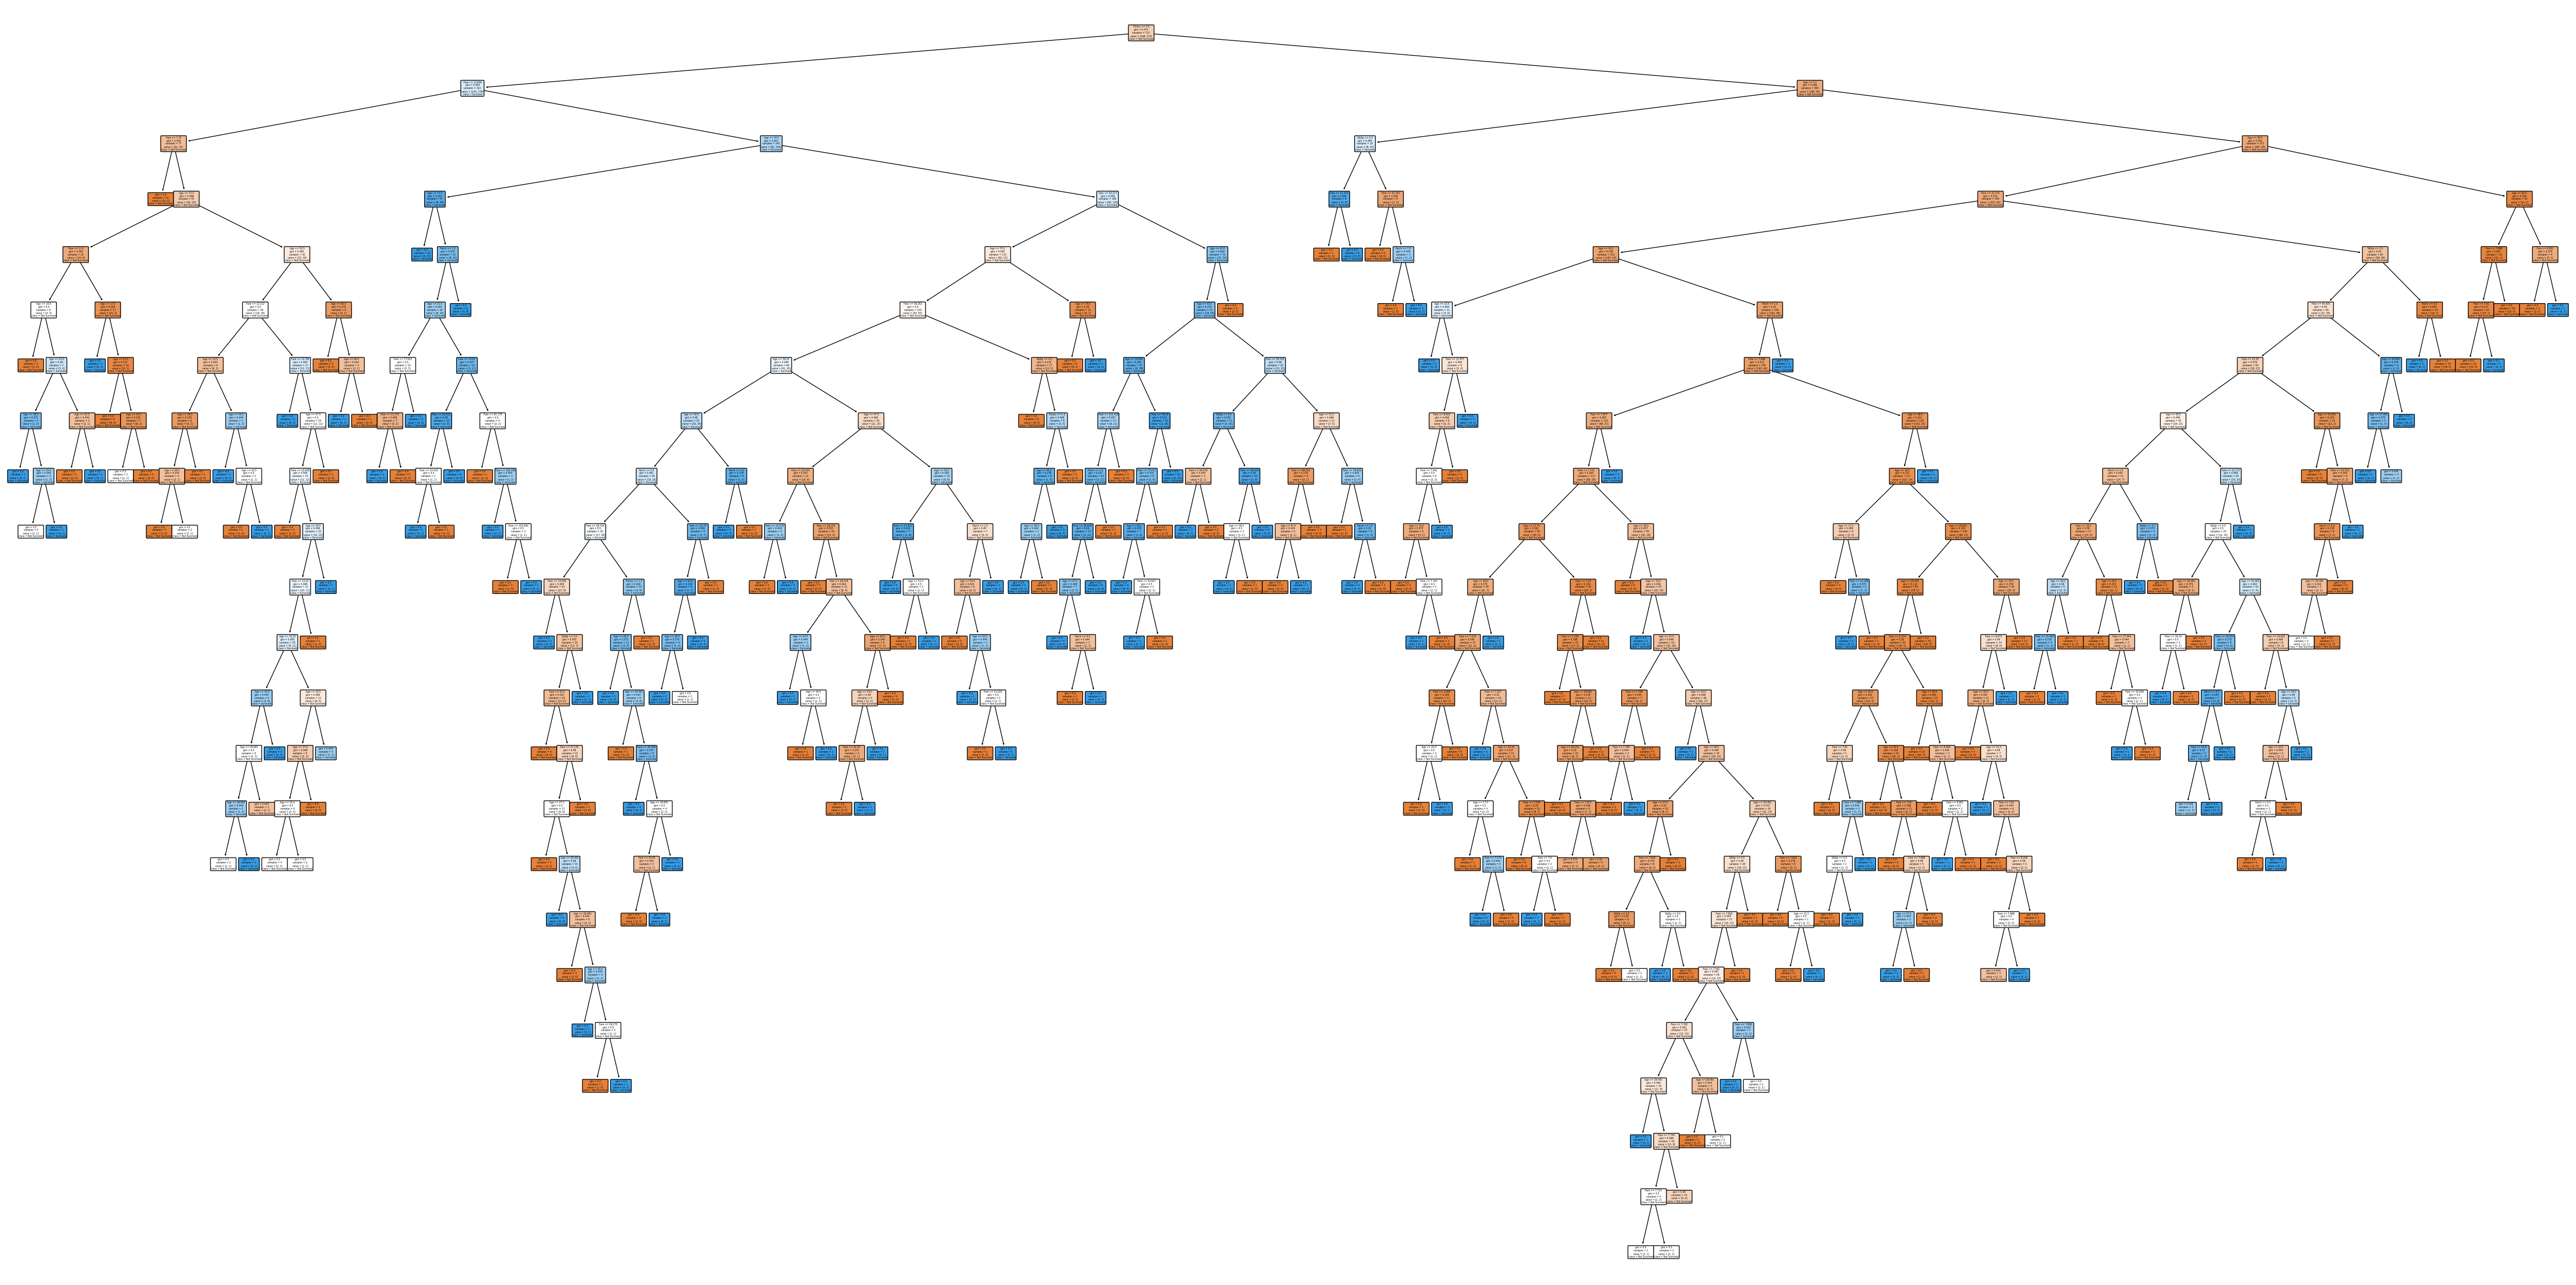

In [29]:
plt.figure(figsize=(64, 32))
plot_tree(
     my_tree,
     filled=True, 
     rounded=True, 
     class_names=['Not Survived','Survived'], 
     feature_names=X_num.columns
     );

##### Our tree is too big which indicates that our model is too complex which is a common characteristic of models that suffer from overfitting.
we will reduce the complexity (pruning the tree) by introducing hyperparameters of the tree. We will treat this in the coming notebooks